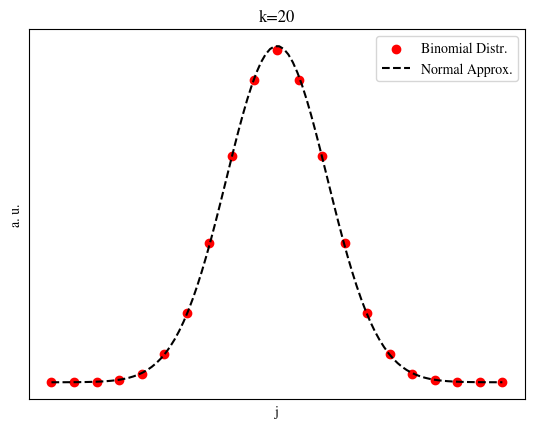

In [39]:
from scipy.stats import binom, norm 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'stix' 
rcParams['font.family'] = 'STIXGeneral' 

p = 0.5 
k = 20

j_arr = np.arange(k+1)
j_cont = np.linspace(0,k, 100)
binom_arr = [binom.pmf(j, k, p) for j in j_arr]
norm_arr = [norm.pdf(j,loc=k*p, scale=np.sqrt(k*p*(1-p))) for j in j_cont]

plt.title(f"k={k}")
plt.scatter(j_arr, binom_arr, label="Binomial Distr.", color="red")
plt.plot(j_cont, norm_arr, color="black", ls="--", label="Normal Approx.")
plt.legend()
plt.xlabel("j")
plt.ylabel("a. u.")
plt.yticks([])
plt.xticks([])
plt.show()


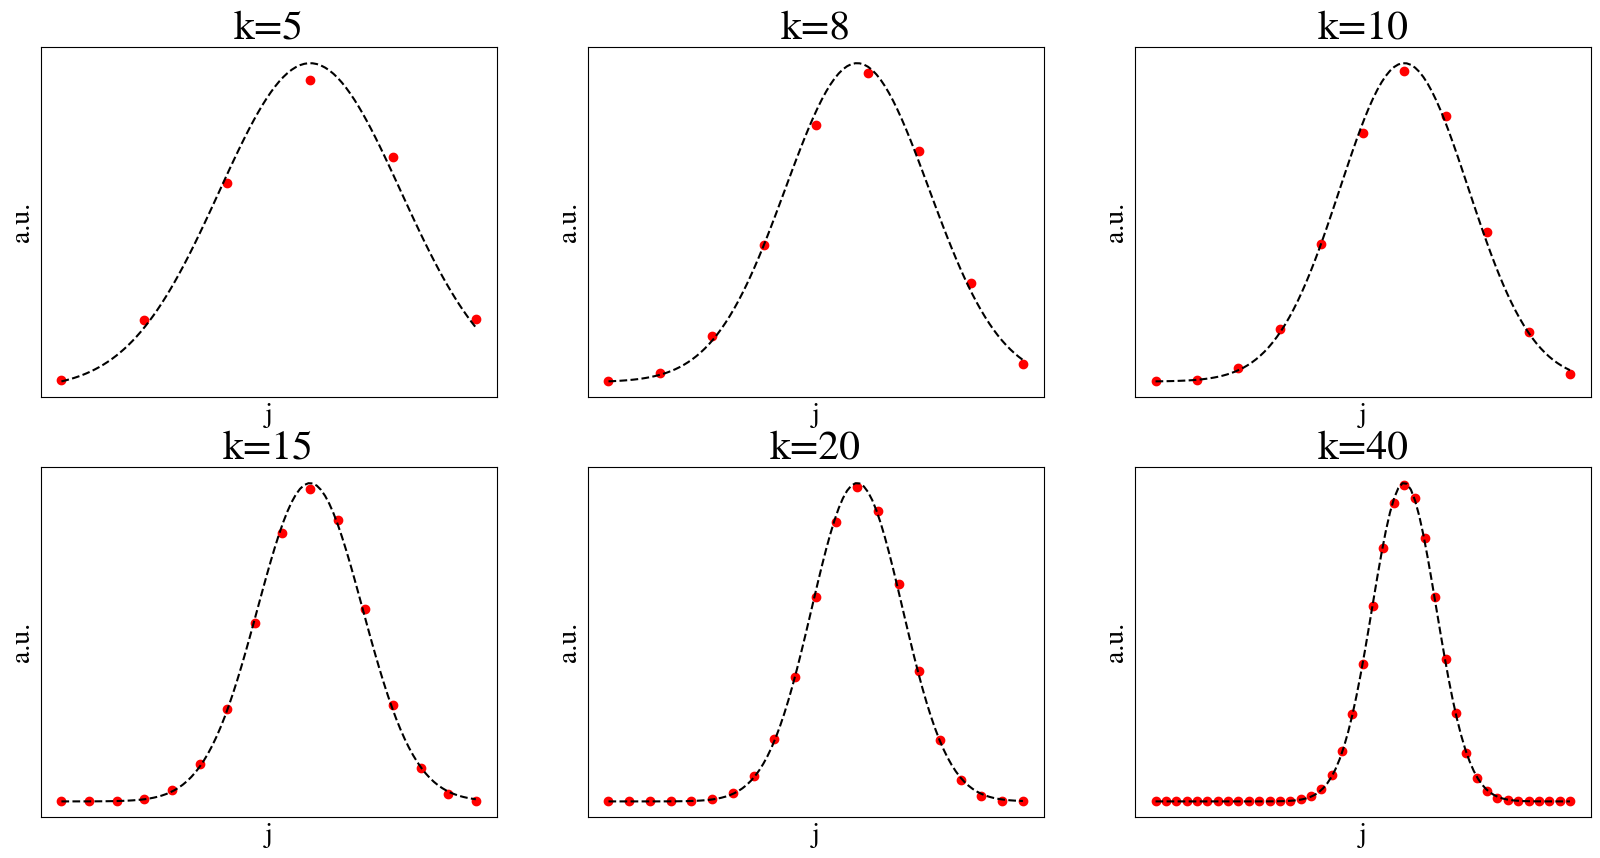

In [63]:

p =0.6
k_arr = [5, 8, 10, 15, 20, 40]

X = 2
Y = 3

fontsize = 20
titlesize = 30

fig, ax = plt.subplots(X, Y, figsize=(20,10))

counter = 0

for i in np.arange(X):
    for j in np.arange(Y):
        k = k_arr[counter]
        j_arr = np.arange(k+1)
        j_cont = np.linspace(0,k, 100)
        binom_arr = [binom.pmf(q, k, p) for q in j_arr]
        norm_arr = [norm.pdf(q,loc=k*p, scale=np.sqrt(k*p*(1-p))) for q in j_cont]

        ax[i,j].scatter(j_arr, binom_arr, label="Binomial Distr.", color="red")
        ax[i,j].plot(j_cont, norm_arr, color="black", ls="--", label="Normal Approx.")
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_ylabel("a.u.", fontsize=fontsize)
        ax[i,j].set_xlabel("j", fontsize=fontsize)
        ax[i,j].set_title(f"k={k}", fontsize=titlesize)

        counter += 1

plt.savefig(f"binom_{p}.pdf")
plt.show()



Number of templates: 100
Number of matches: 5
Number of rounds: 3
sin(theta)=0.224
------------
Norm 0: 1.0000
Norm 1: 1.0000
Norm 2: 1.0000
Norm 3: 1.0000
------------
Probability of measuring marked state: 0.994
Probability of failure: ...


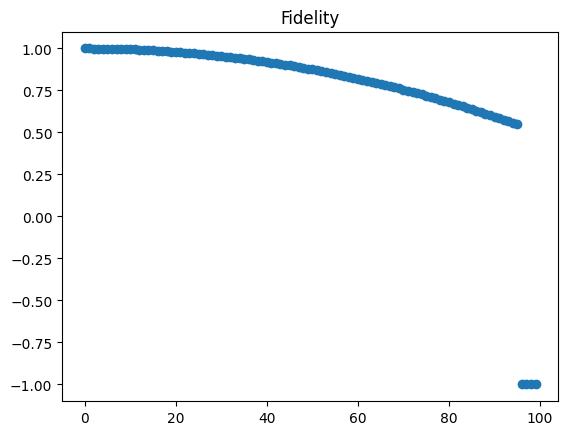

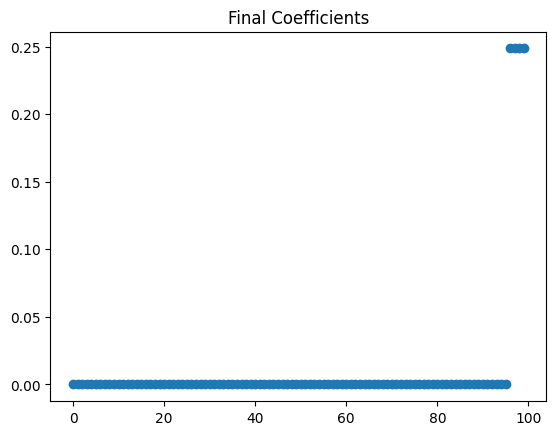

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

N = 100 
M = 5 
s = int(np.pi /4 * np.sqrt(N/M))

print(f"Number of templates: {N}")
print(f"Number of matches: {M}")

print(f"Number of rounds: {s}")
print(f"sin(theta)={np.sqrt(M/N):.3f}")

idx = np.arange(N)
#F = np.array([(-1 if i> N-M else 1) for i in idx]) # ideal Grover 

F = np.array([(-1 if i> N-M else 1-0.5*(i/N)**2) for i in idx])
c = np.ones(N) * 1 / np.sqrt(N)
print("------------")

print(f"Norm 0: {np.sum(np.abs(c)**2):.4f}")

for j in np.arange(s):

    mean = 2*np.mean(F*c)
    c = (mean - F*c) / np.sqrt(np.sum(np.abs(F*c)**2))

    print(f"Norm {j+1}: {np.sum(np.abs(c)**2):.4f}")

print("------------")

prob_marked = np.sum(np.abs(c)**2 *(idx > N-M))
prob_unmarked = np.sum(np.abs(c)**2 *(idx <= N-M))

print(f"Probability of measuring marked state: {prob_marked:.3f}")
print(f"Probability of failure: ...")

plt.scatter(idx, F)
plt.title(f"Fidelity")
plt.show()

plt.scatter(idx, np.abs(c)**2)
plt.title(f"Final Coefficients")
plt.show()

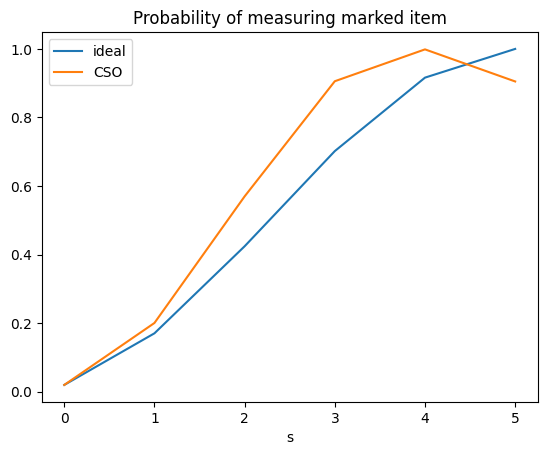

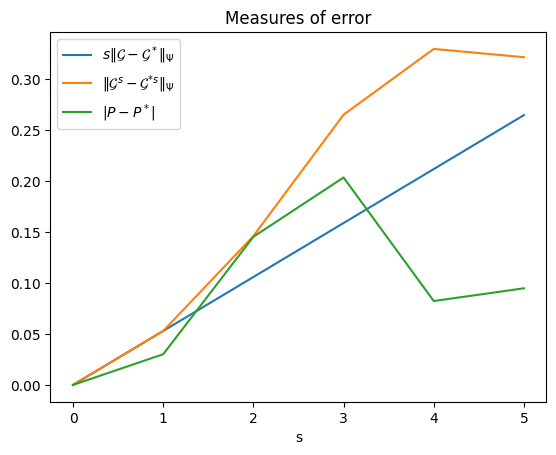

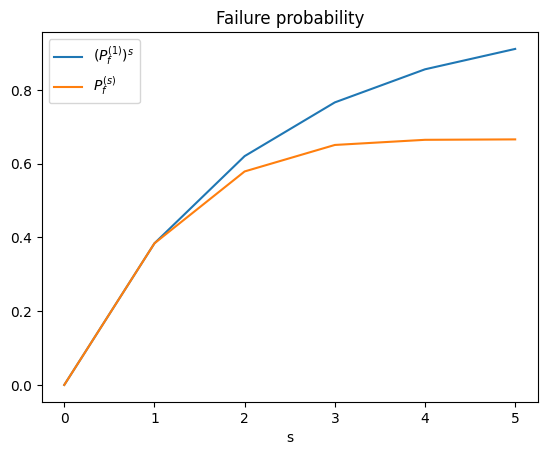

In [52]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import comb 

N = 100
rho = 0.2 # overlap, nor overlap squared!
k = 1000

def c(k): 
    return  0 * k**(0.4)

j_star = int(0.5 * k * (1+ rho**2) - 0.5 * c(k) * np.sqrt(k))

## uniformly sample numbers 
num = np.linspace(0,1,N)

## define overlap distribution
def g_dist(x):
    return np.exp(-x* 100)

## get distribution of overlaps 
rho_arr = g_dist(num) 

## count number of marked entries 
M = np.sum(rho_arr**2 >= rho**2)

## count number of entries in set D_k 
D = np.sum( (rho_arr**2 >= rho**2- 2 * c(k)/ np.sqrt(k)) * (rho_arr**2 < rho**2) )
delta = D / N

## get number of iterations 
s = int(np.pi /4 * np.sqrt(N/M))
theta = np.arcsin(np.sqrt(M/N))

## get ideal Grover fidelities 
F_ideal = np.ones(N)-2* (rho_arr**2 >= rho**2)

## get CSO fidelities
F_CSO = np.empty(N) 
for i in np.arange(N):
    p_0 = 0.5 * (1+ rho_arr[i]**2)
    sum = 0
    for j in np.arange(j_star):
        sum += comb(k,j)*p_0**j *(1-p_0)**(k-j)
    F_CSO[i]= 2*sum - 1     

## set up coefficient arrays 
c_ideal = np.ones((N, s+1)) * np.sqrt(1/N)
c_CSO = np.ones((N, s+1)) * np.sqrt(1/N)

## apply operators 
for i in np.arange(s):

    c_ideal[:,i+1] = 2* np.mean(c_ideal[:,i]*F_ideal)- c_ideal[:,i]*F_ideal 
    c_CSO[:,i+1] = 2* np.mean(c_CSO[:,i]*F_CSO)- c_CSO[:,i]*F_CSO

## extract useful quantities:
c_CSO_norm = c_CSO / np.sqrt(np.sum(np.abs(c_CSO)**2, axis =0))

error = np.sqrt(np.sum(np.abs(c_ideal - c_CSO_norm)**2, axis =0)) 

P_failure = 1 - np.sum(np.abs(c_CSO)**2, axis =0) 

P_ideal_marked = np.empty(s+1)
P_CSO_marked = np.empty(s+1)

for i in np.arange(s+1):
    P_ideal_marked[i] = np.sum(np.abs(c_ideal[:,i] * (rho_arr**2 >= rho**2))**2)
    P_CSO_marked[i] = np.sum(np.abs(c_CSO_norm[:,i] * (rho_arr**2 >= rho**2))**2)

P_CSO_marked

######
s_arr = np.arange(s+1)

plt.plot(s_arr, P_ideal_marked, label="ideal")
plt.plot(s_arr, P_CSO_marked, label="CSO")
plt.legend()
plt.xlabel("s")
plt.title("Probability of measuring marked item")
plt.show()

plt.plot(s_arr, s_arr * error[1], label=r'$s\Vert \mathcal{G} - \mathcal{G}^* \Vert_\Psi$')
plt.plot(s_arr, error, label=r'$\Vert \mathcal{G}^s - \mathcal{G}^{*s} \Vert_\Psi$')
plt.plot(s_arr, np.abs(P_CSO_marked-P_ideal_marked), label=r'$\vert P - P^* \vert$')
plt.legend()
plt.xlabel("s")
plt.title("Measures of error")
plt.show()

plt.plot(s_arr, 1 - (1 - P_failure[1])**s_arr, label=r'$ (P_f^{(1)})^s$')
plt.plot(s_arr, P_failure, label=r'$P_f^{(s)}$')
plt.legend()
plt.xlabel("s")
plt.title("Failure probability")
plt.show()

In [43]:
s

5